Research question

In [15]:
# Define the research question
research_question = "What factors are associated with the development of diabetes in Pima Indian women?"

Selecting Dataset

In [16]:
# Load the Pima Indians Diabetes dataset
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url, header=None)

Importing libraries

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Data cleaning and preprocessing

In [23]:
df.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df.isnull().sum()
df = df.dropna()
df[['glucose', 'bp', 'skin', 'insulin', 'bmi']] = df[['glucose', 'bp', 'skin', 'insulin', 'bmi']].replace(0, np.NaN)
df.isnull().sum()
df.fillna(df.mean(), inplace=True)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(df.drop('label', axis=1))
df_norm = pd.DataFrame(df_norm, columns=df.columns[:-1])
df_norm['label'] = df['label']



Exploratory data analysis

         pregnant     glucose          bp        skin     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  121.686763   72.405184   29.153420  155.548223   32.457464   
std      3.369578   30.435949   12.096346    8.790942   85.021108    6.875151   
min      0.000000   44.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.750000   64.000000   25.000000  121.500000   27.500000   
50%      3.000000  117.000000   72.202592   29.153420  155.548223   32.400000   
75%      6.000000  140.250000   80.000000   32.000000  155.548223   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       label  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

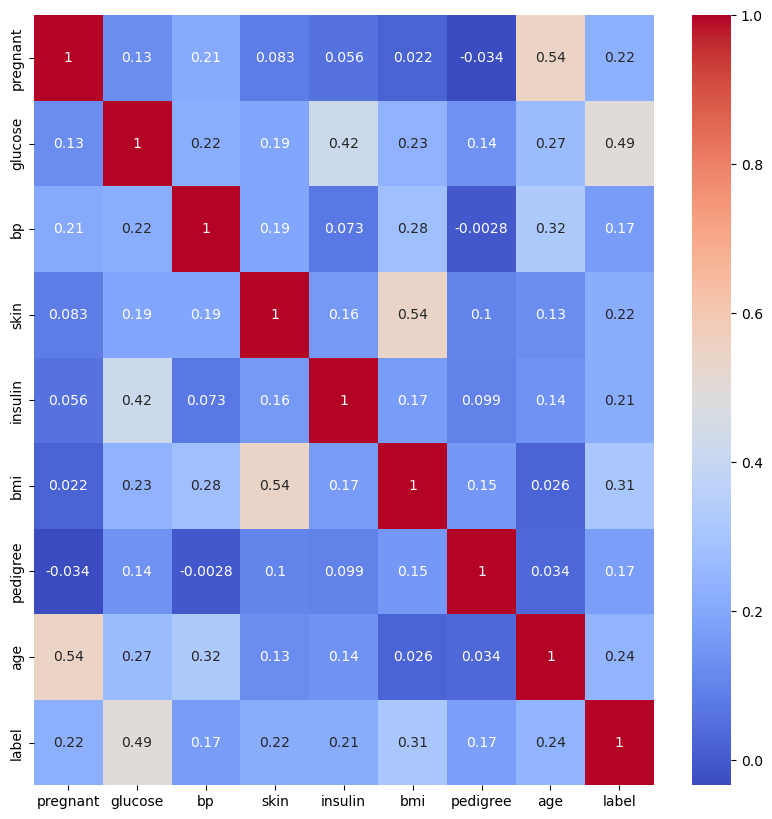

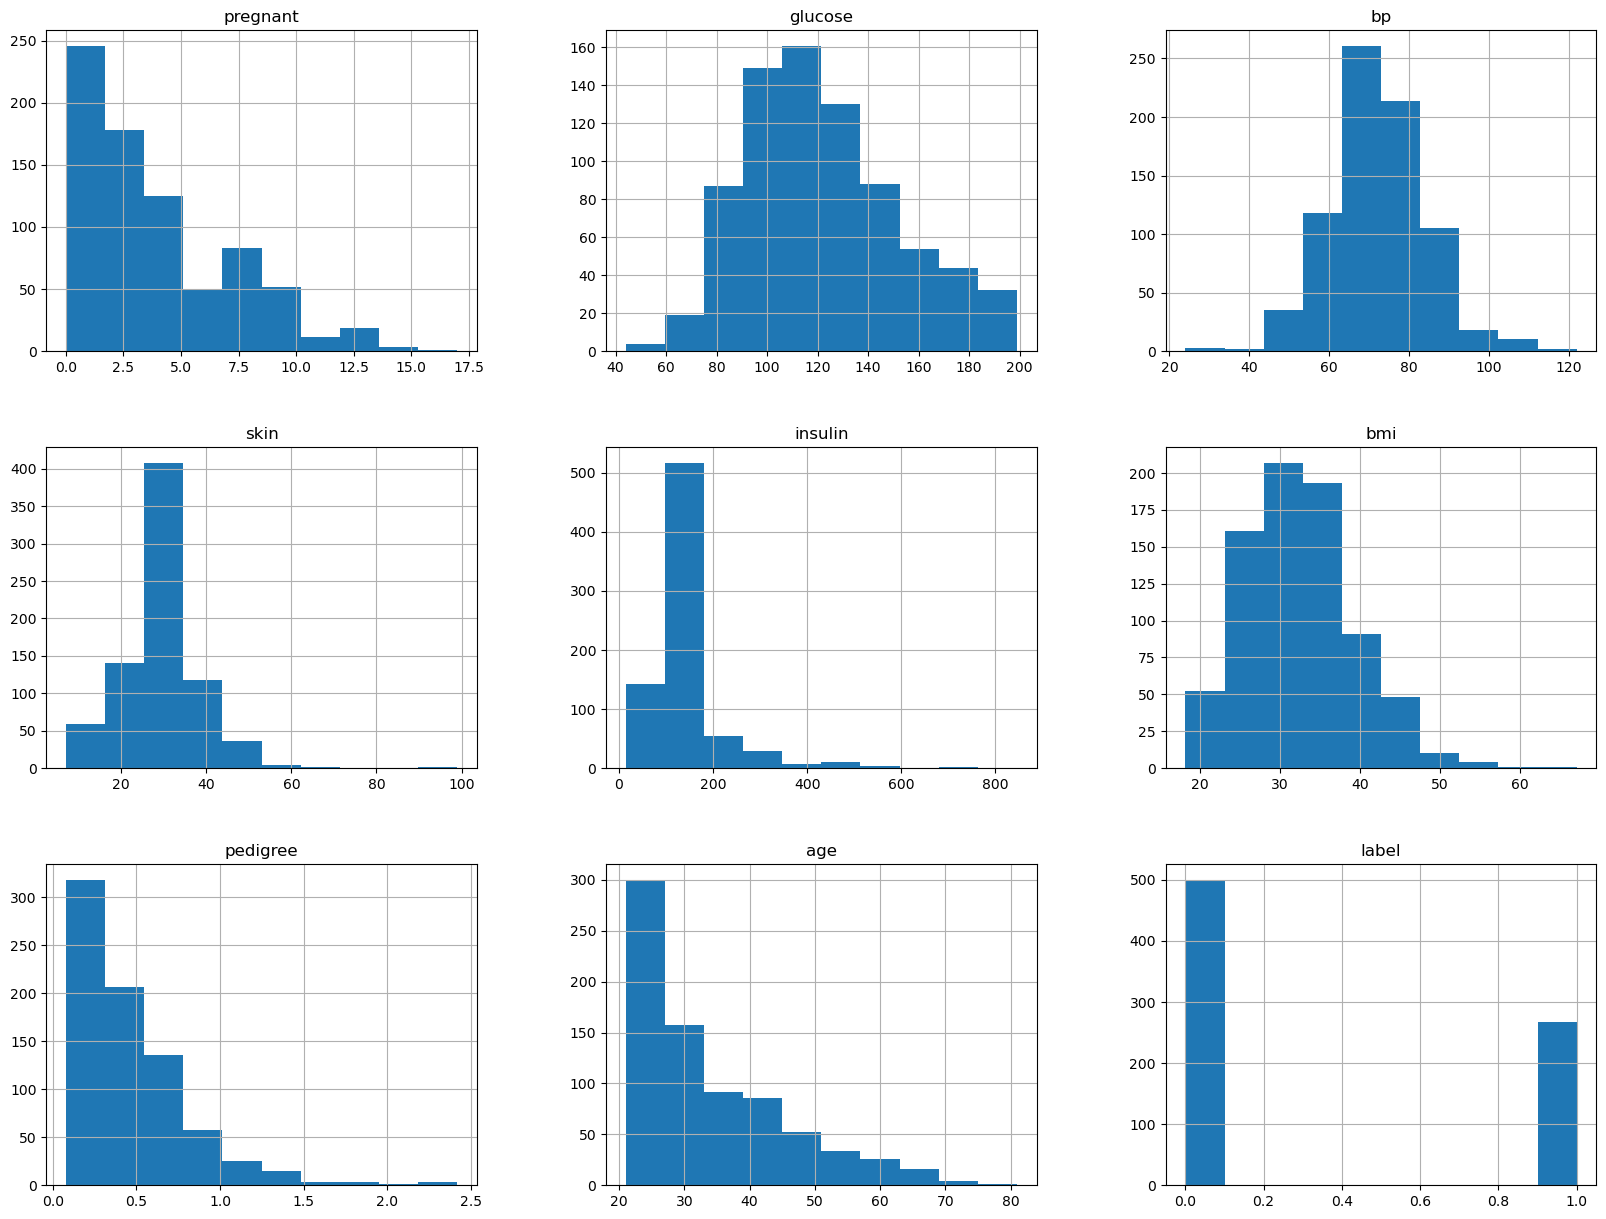

In [24]:
import seaborn as sns
# Create summary statistics
print(df.describe())

# Create a correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Create histograms of the variables
df.hist(bins=10, figsize=(20,15))
plt.show()

Statistical analysis and modeling

In [26]:
# Split the data into training and testing sets
X = df_norm.drop("label", axis=1)
y = df_norm["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

# Decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)

# Random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)

# Print the accuracy scores
print(f"Logistic regression accuracy: {lr_score}")
print(f"Decision tree accuracy: {dt_score}")
print(f"Random forest accuracy: {rf_score}")

Logistic regression accuracy: 0.7532467532467533
Decision tree accuracy: 0.7207792207792207
Random forest accuracy: 0.7532467532467533


Interpret the results

In [27]:
# Print feature importances for random forest
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
for i in indices:
    print(f"{feature_names[i]}: {importances[i]}")
    

glucose: 0.2574371360871144
bmi: 0.16682723948882405
age: 0.131210912998538
pedigree: 0.11896641692795754
insulin: 0.09398375802944853
bp: 0.08419015561804571
skin: 0.07397265325818526
pregnant: 0.0734117275918865
